### Project : Bank Customer Clustering
### Email : nieldeshmukh02@gmail.com

### Problem Statement

The data is related with direct marketing campaigns of a Portuguese banking institution.
Cluster customers on the basis of attributes.

### Data
Only Categorical attributes of Bank Marketing Data Set are used for demonstration.

**Attribute Information(Categorical):**

- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone') 
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

In [37]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

# !pip install kmodes
from kmodes.kmodes import KModes
# supress warnings
import warnings
warnings.filterwarnings('ignore')

## Data Reading and Understading

In [38]:
bank = pd.read_csv('bankmarketing.csv')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [39]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### Importing Categorical Columns only

In [40]:
bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]

In [41]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [42]:
#bank_cust.day_of_week.nunique()  ## 5
#bank_cust.month.nunique()  ## 10

### Binning

In [43]:
# Converting age into categorical variable.
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bank_cust0 = bank_cust.drop('age',axis = 1)

In [44]:
bank_cust0.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


## Data Inspection

In [46]:
bank_cust.shape

(41188, 12)

In [47]:
bank_cust.describe()

,age
count,41188.00000
mean,40.02406
std,10.42125
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


In [48]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          41188 non-null  int64   
 1   job          41188 non-null  object  
 2   marital      41188 non-null  object  
 3   education    41188 non-null  object  
 4   default      41188 non-null  object  
 5   housing      41188 non-null  object  
 6   loan         41188 non-null  object  
 7   contact      41188 non-null  object  
 8   month        41188 non-null  object  
 9   day_of_week  41188 non-null  object  
 10  poutcome     41188 non-null  object  
 11  age_bin      41188 non-null  category
dtypes: category(1), int64(1), object(10)
memory usage: 3.5+ MB


## Data Cleaning

In [49]:
# Checking Null values
bank_cust.isnull().sum()*100/bank_cust.shape[0]


age            0.0
job            0.0
marital        0.0
education      0.0
default        0.0
housing        0.0
loan           0.0
contact        0.0
month          0.0
day_of_week    0.0
poutcome       0.0
age_bin        0.0
dtype: float64

#### There are no NULL values in the dataset, hence it is clean.

### As it is just a demo for K-Modes we will skip EDA and jump straight to model building

In [50]:
# First we will keep a copy of data
bank_cust_copy = bank_cust.copy()

## Data Preparation

In [53]:
# Encoding of categorical variables
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust1 = bank_cust0.apply(le.fit_transform)
bank_cust1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


## Using K-Mode with "random" initialization
Now we can begin our cluster analysis. First, let's do a sweep of the number of clusters and look at how cost changes as we increase the cluster number. I will be using the elbow method to determine the optimal number of clusters. The elbow of the cost plot represents the point where we stop seeing significant improvement in our clustering cost function as we continue to increase the number of clusters.

In [15]:
# Initially with 2 clusters
km_random = KModes(n_clusters=2, init = "random", n_init = 1, verbose=1)
clusters_random = km_random.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10074, cost: 197536.0


In [16]:
# Predicted Clusters
clusters_random

array([0, 0, 0, ..., 1, 1, 1], dtype=uint16)

In [17]:
clusterCentroidsDf = pd.DataFrame(km_random.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [18]:
# Mode of the clusters
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,0,1,6,0,0,0,1,6,4,1,2
1,1,1,6,0,2,0,0,6,0,1,2


## Choosing K by comparing Cost against each K

In [19]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 3, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 216952.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10415, cost: 195130.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8680, cost: 193981.0
Run 2, iteration: 2/100, moves: 2867, cost: 193981.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 11252, cost: 194354.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 

### Elbow curve to find optimal K

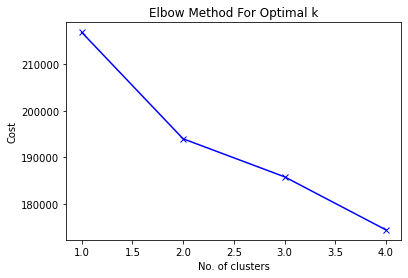

In [20]:
K = np.array([i for i in range(1,5,1)])
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

**We will go with 3 Clusters for our analysis, since it looks like our optimal number of clusters based on the elbow in the above cost plot**

### Building the model with 3 clusters

In [21]:
km_random = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
fitClusters_random = km_random.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12424, cost: 182540.0
Run 1, iteration: 2/100, moves: 1052, cost: 182540.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12043, cost: 186512.0
Run 2, iteration: 2/100, moves: 1421, cost: 186512.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9994, cost: 181992.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 15033, cost: 184363.0
Run 4, iteration: 2/100, moves: 1512, cost: 184363.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 8286, cost: 185350.0
Best run was number 3


In [22]:
fitClusters_random

array([1, 1, 1, ..., 2, 2, 2], dtype=uint16)

### Combining the predicted clusters with the original DF.

In [23]:
bank_cust = bank_cust_copy.reset_index()

In [24]:
clustersDf = pd.DataFrame(fitClusters_random)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [25]:
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60,1
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60,1
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40,1
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60,1


### Cluster Identification

In [26]:
# No. of observations belongs to clusters 0, 1 & 2.
combinedDf.groupby("cluster_predicted").size()
# sns.countplot(y="cluster_predicted", data=combinedDf)

cluster_predicted
0    15837
1    13899
2    11452
dtype: int64

In [27]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

## Cluster Visualization
In order to determine any trends or insights from the clustered data, we will look at count plots for each feature.

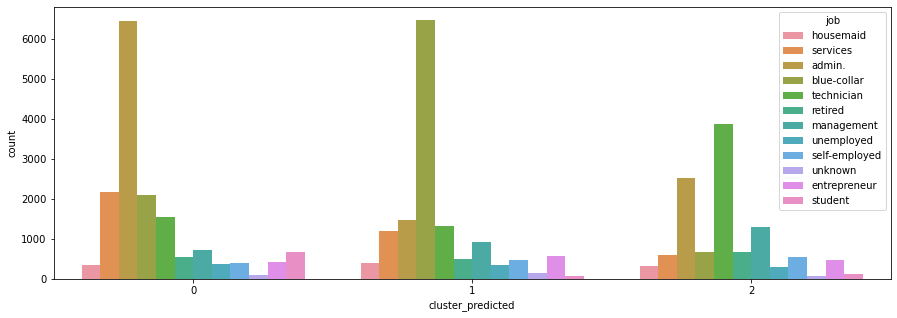

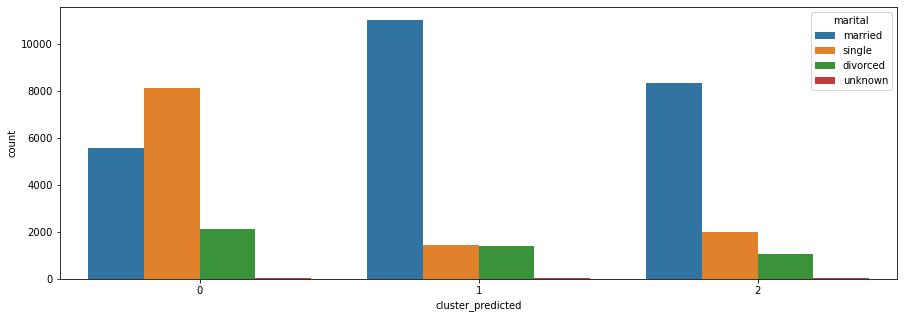

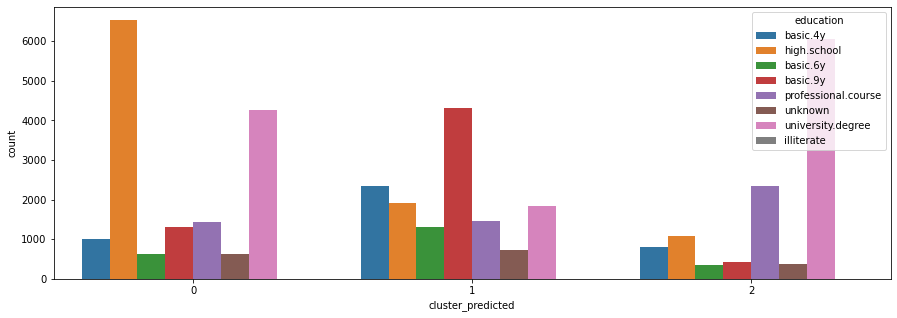

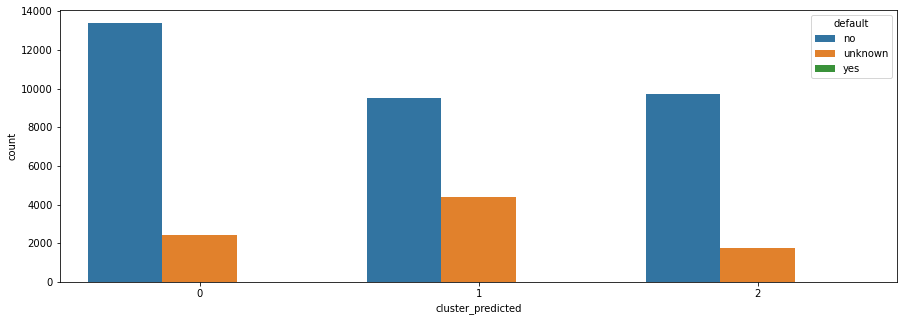

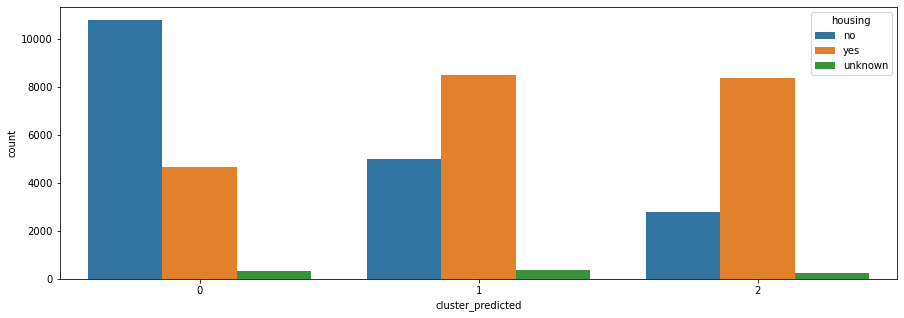

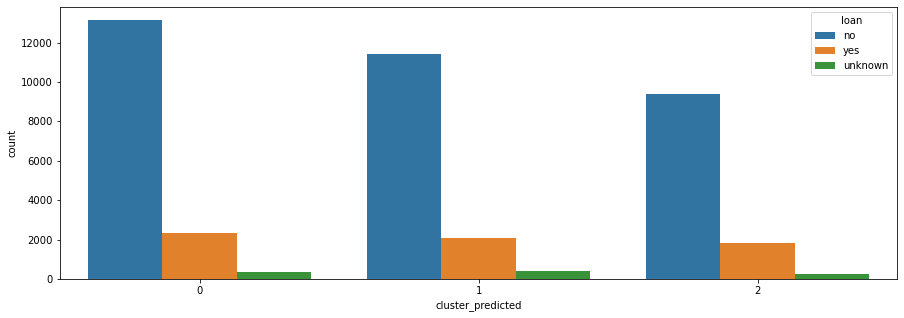

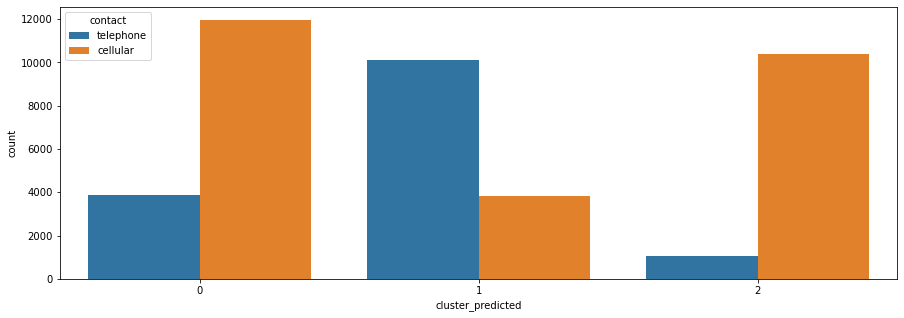

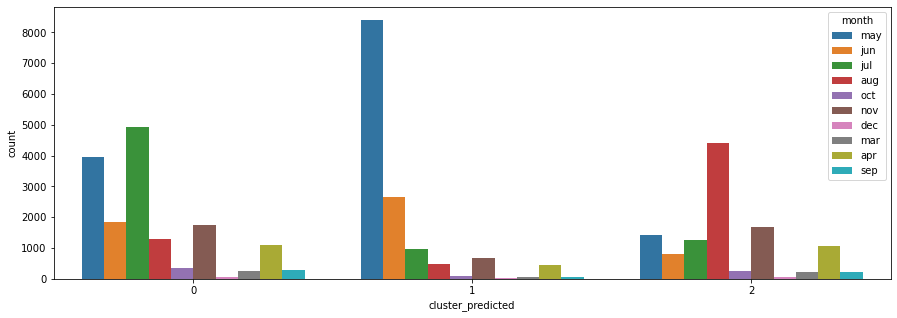

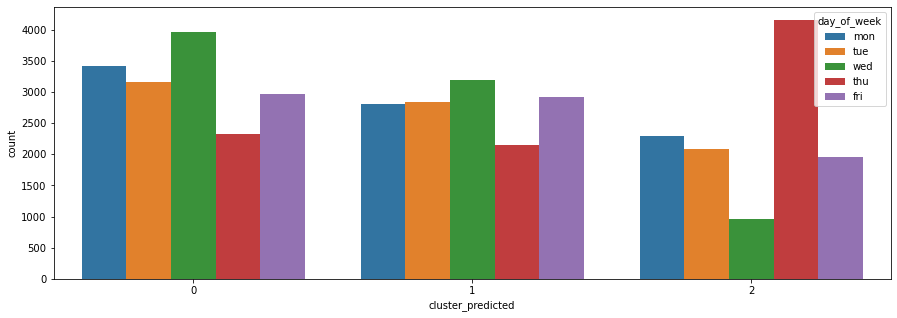

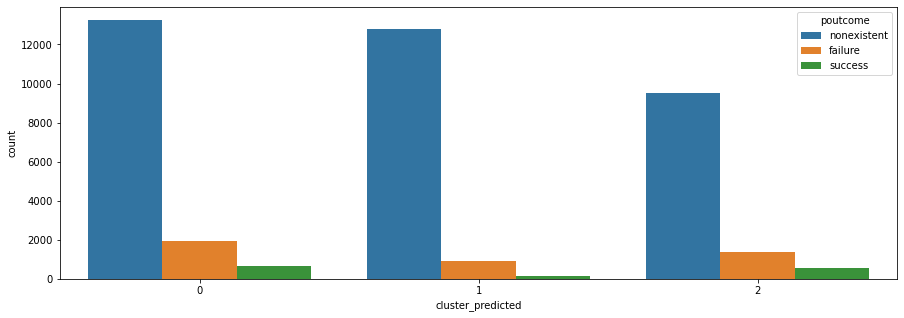

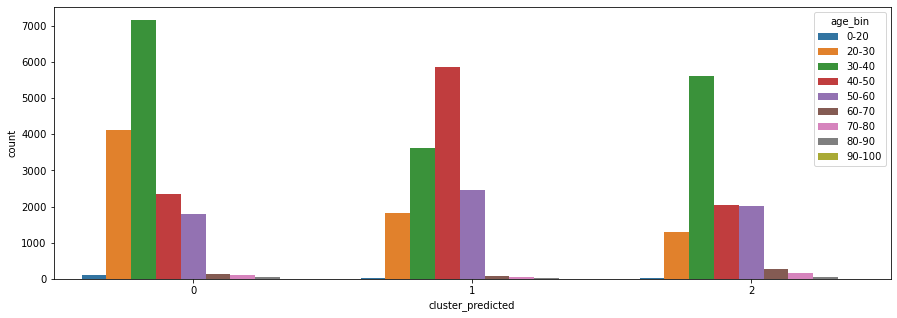

In [54]:
for col in bank_cust1:
    plt.subplots(figsize = (15,5))
    sns.countplot(x=combinedDf['cluster_predicted'],hue=col, data = bank_cust0)
    plt.show()

### Observations
Based on the plots above, these are the insights that I was able to gather

* job-type: Larger proportion of 'admin' in cluster 0, Larger proportion of 'blue-collar' in cluster 1,Larger proportion of 'technician' in cluster 2.
* marital_status: Larger proportion of 'single' in cluster 0, similar proportion of 'married' in clusters 1 & 2.
* education_level: Larger proportion of 'high school' in cluster0, Larger proportion of 'basic.9y' in cluster1,Larger proportion of 'university.degree' in cluster 2.
* has credit in default: Larger proportion of 'no' in cluster 0, Larger proportion of 'unknown' in cluster 1.

* has housing_loan?: Larger proportion of 'no' in cluster 0, similar proportion of 'yes' in clusters 1 & 2.

* contact_type: Larger proportion of 'telephone' in cluster 1, similar proportion of 'cellular' in cluster 0 & 2.

* last contact month: Larger proportion of 'may' in cluster 1, Larger proportion of 'jul' in cluster 0,Larger proportion of 'aug' in cluster 2.

* last contact day_of_week: Larger proportion of 'thu' in cluster 2.

* age_range: Larger proportion of '30-40' year-range in cluster 0 & 2, similar proportion of '40-50' range in clusters 1.